<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/master/predict_aquatic_toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aquatic Toxity using TensorFlow

Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import libraries

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

In [3]:
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";")
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

## Split data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitive response'),
                                                   data['quantitive response'],
                                                   test_size=0.3)

## Train and test the models

In [5]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

Mead Squared Error Linear Regression :  1.4069986822386589
Mead Squared Error Multilayer Perceptron :  1.5740826096910534


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


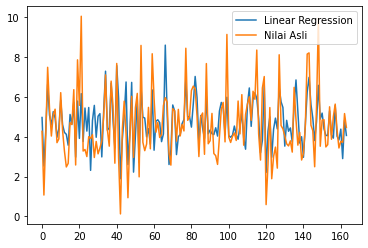

In [6]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

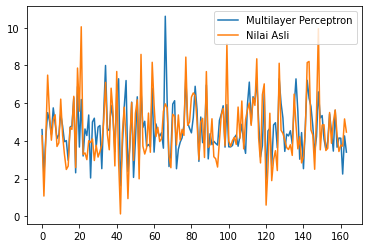

In [7]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

<h2>TENSORFLOW PART</h2>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

## Modeling

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Consists of :
8 nodes in the input layer
8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [10]:
model = Simple_NN()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Training model

In [11]:
model.fit(x_train, y_train, epochs=200, validation_split = 0.2, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 19ms/step - loss: 5688.5264 - mae: 47.9085 - mse: 5842.1084 - val_loss: 3825.4993 - val_mae: 42.4524 - val_mse: 3700.1980
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 3518.4563 - mae: 37.1280 - mse: 3658.1938 - val_loss: 2629.7368 - val_mae: 34.8126 - val_mse: 2534.9829
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 2507.8545 - mae: 30.1716 - mse: 2497.7446 - val_loss: 1711.3081 - val_mae: 27.6371 - val_mse: 1641.7242
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 1517.9792 - mae: 23.8997 - mse: 1578.7963 - val_loss: 1073.2780 - val_mae: 21.3529 - val_mse: 1022.4113
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 949.9619 - mae: 18.0345 - mse: 970.1711 - val_loss: 621.9750 - val_mae: 15.6800 - val_mse: 586.0807
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 517.3412 - mae: 13.1986 - mse: 529.1011 - val

## Using model to predict the <b>x_test</b>

In [12]:
hasil_tf = model.predict(x_test)

# HASIL PREDIKSI
hasil_tf.ravel()

array([ 3.9272752 ,  1.8701423 ,  3.489388  ,  5.505734  ,  5.1806583 ,
        3.71341   ,  5.163359  ,  4.1892304 ,  4.1796713 ,  4.395856  ,
        5.471845  ,  4.623673  ,  2.4047513 ,  4.0342097 ,  3.2144938 ,
        5.061693  ,  4.2603974 ,  5.220202  ,  2.2158942 ,  5.0486455 ,
        2.8807244 ,  4.432387  ,  3.450162  ,  5.293685  ,  4.2280755 ,
        4.619283  ,  0.20215645,  4.9889026 ,  3.239182  ,  3.355414  ,
        2.220963  ,  1.7770313 ,  2.2359738 ,  5.5348067 ,  6.5707154 ,
        4.2262955 ,  4.4311094 ,  5.7352395 ,  5.014087  ,  2.667954  ,
        6.316527  ,  2.1286244 ,  1.6379398 ,  4.367906  ,  4.9566293 ,
        4.6988683 ,  2.3400645 ,  1.3957828 ,  6.935686  ,  2.0868115 ,
        3.6729693 ,  6.4079766 ,  0.94305074,  4.8784394 ,  3.3629956 ,
        3.9477277 ,  3.7471404 ,  3.5896192 ,  2.8607793 ,  5.2540774 ,
        1.663258  ,  2.8553967 ,  3.844771  ,  2.707787  ,  2.9402928 ,
        2.9081683 , 10.2039175 ,  3.885571  ,  1.7012028 ,  2.63

## Evaluate the model using <b>mean squared error</b>

In [13]:
mean_squared_error(y_test, hasil_tf)

2.6808352500583896

Getting smaller the MSE of a model, getting better model in predicting

## Line chart

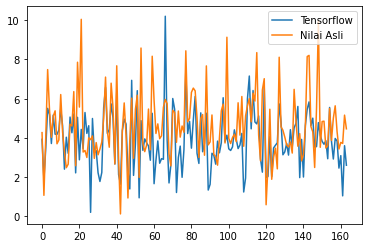

In [14]:
plt.plot(list(hasil_tf), label='Tensorflow')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")